## 공공데이터 과제 #2

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv('subwaytime.csv', encoding='utf-8-sig')
df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,Jun.24,1호선,150.0,서울역,654,20,8727,9083,13812,56637,...,27544,13883,2863,3984,3,215,0,0,0,0
2,Jun.24,1호선,151.0,시청,74,0,2105,5374,4050,25949,...,10250,3898,502,991,1,38,0,0,0,0
3,Jun.24,1호선,152.0,종각,132,7,4291,5787,4312,32747,...,26952,4587,1676,1300,0,0,0,0,0,0
4,Jun.24,1호선,153.0,종로3가,206,13,4296,3015,3961,13851,...,18427,5240,1765,2042,2,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Jun.24,신림선,4407.0,당곡,1,0,2159,212,4454,1247,...,971,4036,245,1308,0,0,0,0,0,0
619,Jun.24,신림선,4408.0,신림,0,0,1005,298,1529,822,...,825,1650,259,635,0,0,0,0,0,0
620,Jun.24,신림선,4409.0,서원,3,1,2405,348,4250,784,...,457,4206,90,1367,0,0,0,0,0,0
621,Jun.24,신림선,4410.0,서울대벤처타운,26,0,6532,497,10429,3697,...,1982,12499,433,4844,1,1,0,0,0,0


In [220]:
def find_subway_population(line):
    df_station = df[df['호선명'] == line][['호선명', '지하철역', 'Unnamed: 11', 'Unnamed: 13']]
    df_station_num = df_station.iloc[:, 2:]
    df_station_num.columns = ['07:00:00~07:59:59', '08:00:00~08:59:59']
    df_station_num = df_station_num.apply(pd.to_numeric)
    max_index = df_station_num.sum(axis = 1).idxmax()
    station_name = df_station.loc[max_index, '지하철역']
    max_value = df_station_num.sum(axis = 1).max()
    return [station_name, max_value]

station_list = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선']

name_list = []
value_list = []

for i in station_list:
    name_list.append(f'{i} {find_subway_population(i)[0]}')
    value_list.append(find_subway_population(i)[1])

print(name_list, value_list)

['1호선 종각', '2호선 역삼', '3호선 양재(서초구청)', '4호선 충무로', '5호선 여의도', '6호선 공덕', '7호선 가산디지털단지'] [356704, 488949, 318850, 224078, 340464, 131646, 494848]


출근 시간대 1호선 최대 하차역: 1호선 종각역, 하차인원: 356,704명
출근 시간대 2호선 최대 하차역: 2호선 역삼역, 하차인원: 488,949명
출근 시간대 3호선 최대 하차역: 3호선 양재(서초구청)역, 하차인원: 318,850명
출근 시간대 4호선 최대 하차역: 4호선 충무로역, 하차인원: 224,078명
출근 시간대 5호선 최대 하차역: 5호선 여의도역, 하차인원: 340,464명
출근 시간대 6호선 최대 하차역: 6호선 공덕역, 하차인원: 131,646명
출근 시간대 7호선 최대 하차역: 7호선 가산디지털단지역, 하차인원: 494,848명


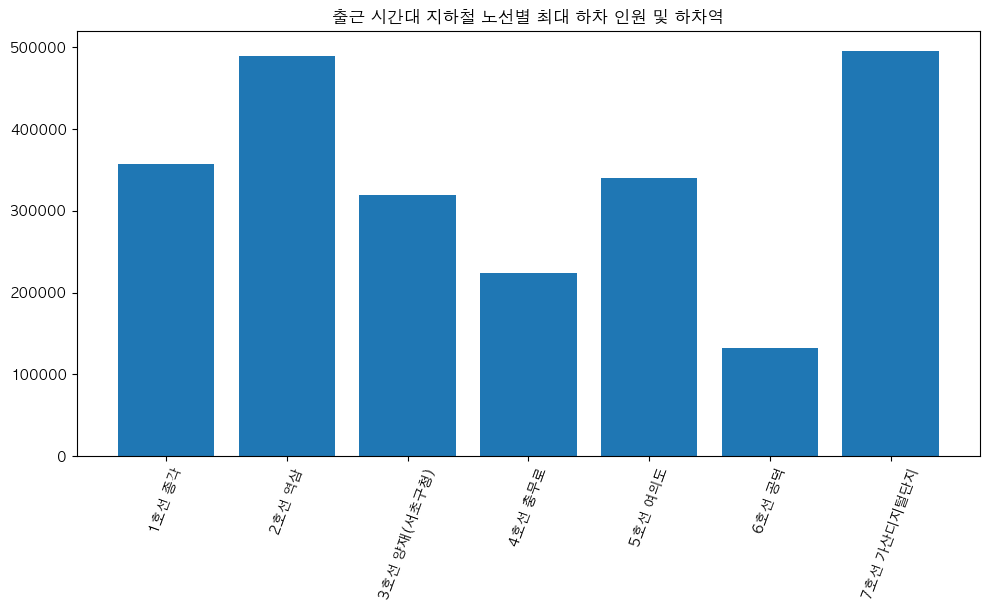

In [228]:
for i in range(len(station_list)):
    print(f'출근 시간대 {station_list[i]} 최대 하차역: {name_list[i]}역, 하차인원: {value_list[i]:,}명')

plt.figure(figsize = (10, 5))
plt.rcParams['font.family'] = 'AppleGothic'
plt.bar(name_list, value_list)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.tight_layout()
plt.xticks(rotation = 70)
plt.show()